# Configuring Sonnet's BatchNorm Module

This colab walks you through Sonnet's BatchNorm module's different modes of operation. 

The module's behaviour is determined by three main parameters: One constructor argument (```update_ops_collection```) and two arguments that are passed to the graph builder (```is_training``` and ```test_local_stats```). 

```python
bn = BatchNorm(update_ops_collection)
bn(inputs, is_training, test_local_stats)

```

The following diagram visualizes how different parameter settings lead to different modes of operation. Bold arrows mark the current default values of the arguments.

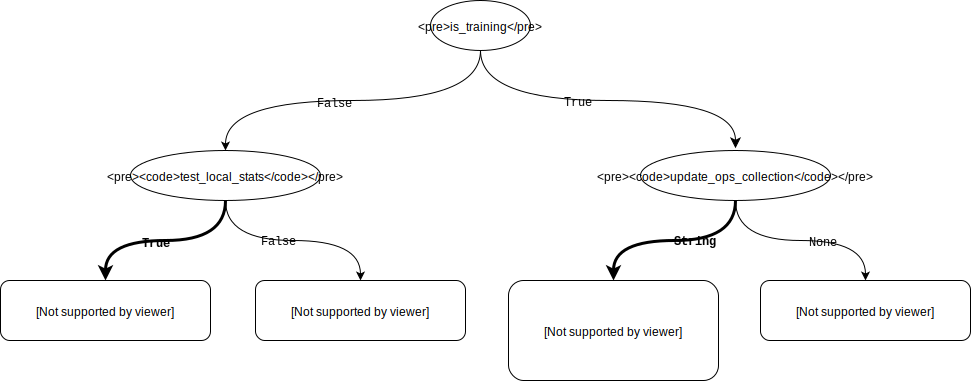

In [2]:
#@title Decision tree
%%svg
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN" "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<svg
  xmlns="http://www.w3.org/2000/svg"
  xmlns:xlink="http://www.w3.org/1999/xlink" width="971px" height="384px" version="1.1" content="&lt;mxfile userAgent=&quot;Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36&quot; version=&quot;6.7.3&quot; editor=&quot;www.draw.io&quot;&gt;&lt;diagram name=&quot;Page-1&quot;&gt;7Vptc5s4EP41fLQHkMHxx9pNrh96mZtJb3r3ySODDLoKxAnhl/76roR4C7bHl5CEXOuZTORHy2q1++yuZNtCq+Twm8BZ/DsPCbNcOzxY6KPlwstz4Z9CjiUyd+wSiAQNS8hpgAf6nRiwEitoSPKOoOScSZp1wYCnKQlkB8NC8H1XbMtZd9UMR6QHPASY9dGvNJRxid64foN/IjSKq5Udf1HObHDwLRK8SM16lou2+lVOJ7jSZTaaxzjk+xaEbi20EpzLcpQcVoQp31ZuK5+7OzNb2y1IKq95wDNmyGO1dW08UdO2hZaxTBgMHRiSA5V/KXjqmXd/m5l/iJRHE0RcSA4QFzLmEU8x+8x5VmkIwclmpUbgtkGXQSF2em0lnkvBv9X+R4CUxio1Z7droJwXIjBShosSi4gYKVS7GihMeEKkOIKIIAxLuutqx4ZLUS3X+BMGxqWn3TsvVewwK4zSLwJGj30uyUF2nS1ITr/jjRZQccg4TaU2xFta3kdAMKNRCkAAWycCgB0RkgKFP5iJhIahdirDG8KWNTFXnHGh162oiZZbnso7nFCm8nUFvqOg0rXvyd5MVmEzPlFrkcOpVDQ2NwxvB8c77XajaGJPnTlC5WPHjvKrA2OU/6Hc1RLh220OsX8cudqGq4Lp9+L2Hwn9gqk1WGbMXikzbnqZcYdZ/t5S41nZ4F/MBkgGuwrQKOjv9iJmuT5TwckExM2P1JDmaykwTWkaVbOgtyXQzyHGoKurYOxjKslDhjU793Cw6Mb9rK97JD/rUxfZnepSRWXf9HjHNljc6u+e/XzCO05/66MpH0O1WtQvKI59OiSDVxSnT9AHKTQR31VNGa7dOpezAfqt20mHyZjKjYNGnC+DZcfitZJj1kuOe57+VO3WOXPor/uta89nnXwY0+ETXdN9KyiAC3mFFVmIJVnzLF8HnDHwEuVpqze3ZUfYsmezbst25id69uKlevZ8xDWo27OfXpVmJ3r2mYva8GVp0aP1T3cNKEl28VaMZotOEoypT9efZI0/R55+rj2VI2eub4PnSKXj14dIbcJdujePKDv6x64r27YkuVwzDqFY5xJD1N5Nx57M37Bj9/tJ5aGCPfYZox0n+f8WvPT8QU5MYnwACUa2spmtlNxzkYAQVCDX5oXMCkWdItfXTVvHzVLfBsgg1osAE3NIrHYY1fIDGvSnPufBdMJ3pRUYwogjkiv3pKroYW3Mlos9FqGOaX7ZIADbbntEqqZuO69CLM/vEgvZfWLV3yC1ieUPcRS0fzEL7hAlf1QrjM9xDas6ZGcMmBBW1MPwl+JEA80tZGqpWl5auKlW+xKTY60l5Wrz5ECCQuqHVbNPsG5R7Dht7XlzgrtjJzSyb55G6PpDymcx2hsFo3PJhQ5tj0vTl6P0PVcWdHldMi4QBMDw8trjopHnvWFZ9EdBorcoi/8rDk1c+/WaK7xtfuFQHqqbn5Gg2x8=&lt;/diagram&gt;&lt;/mxfile&gt;" style="background-color: rgb(255, 255, 255);">
  <defs/>
  <g transform="translate(0.5,0.5)">
    <path d="M 480 50 Q 480 100 607.5 100 Q 735 100 735 139.9" fill="none" stroke="#000000" stroke-width="1" stroke-miterlimit="10" pointer-events="none"/>
    <path d="M 735 146.65 L 730.5 137.65 L 735 139.9 L 739.5 137.65 Z" fill="#000000" stroke="#000000" stroke-width="1" stroke-miterlimit="10" pointer-events="none"/>
    <g transform="translate(562.5,93.5)">
      <switch>
        <foreignObject style="overflow:visible;" pointer-events="all" width="29" height="12" requiredFeatures="http://www.w3.org/TR/SVG11/feature#Extensibility">
          <div
            xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; font-size: 12px; font-family: &quot;Courier New&quot;; color: rgb(0, 0, 0); line-height: 1.2; vertical-align: top; white-space: nowrap; text-align: center;">
            <div
              xmlns="http://www.w3.org/1999/xhtml" style="display:inline-block;text-align:inherit;text-decoration:inherit;background-color:#ffffff;">True
            </div>
          </div>
        </foreignObject>
        <text x="15" y="12" fill="#000000" text-anchor="middle" font-size="12px" font-family="Courier New">True</text>
      </switch>
    </g>
    <path d="M 480 50 Q 480 100 352.5 100 Q 225 100 225 143.63" fill="none" stroke="#000000" stroke-miterlimit="10" pointer-events="none"/>
    <path d="M 225 148.88 L 221.5 141.88 L 225 143.63 L 228.5 141.88 Z" fill="#000000" stroke="#000000" stroke-miterlimit="10" pointer-events="none"/>
    <g transform="translate(316.5,94.5)">
      <switch>
        <foreignObject style="overflow:visible;" pointer-events="all" width="36" height="12" requiredFeatures="http://www.w3.org/TR/SVG11/feature#Extensibility">
          <div
            xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; font-size: 12px; font-family: &quot;Courier New&quot;; color: rgb(0, 0, 0); line-height: 1.2; vertical-align: top; white-space: nowrap; text-align: center;">
            <div
              xmlns="http://www.w3.org/1999/xhtml" style="display:inline-block;text-align:inherit;text-decoration:inherit;background-color:#ffffff;">False
            </div>
          </div>
        </foreignObject>
        <text x="18" y="12" fill="#000000" text-anchor="middle" font-size="12px" font-family="Courier New">False</text>
      </switch>
    </g>
    <ellipse cx="480" cy="25" rx="50" ry="25" fill="#ffffff" stroke="#000000" pointer-events="none"/>
    <g transform="translate(439.5,6.5)">
      <switch>
        <foreignObject style="overflow:visible;" pointer-events="all" width="80" height="36" requiredFeatures="http://www.w3.org/TR/SVG11/feature#Extensibility">
          <div
            xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; font-size: 12px; font-family: Helvetica; color: rgb(0, 0, 0); line-height: 1.2; vertical-align: top; width: 80px; white-space: nowrap; word-wrap: normal; text-align: center;">
            <div
              xmlns="http://www.w3.org/1999/xhtml" style="display:inline-block;text-align:inherit;text-decoration:inherit;">
              <pre>is_training</pre>
            </div>
          </div>
        </foreignObject>
        <text x="40" y="24" fill="#000000" text-anchor="middle" font-size="12px" font-family="Helvetica">&lt;pre&gt;is_training&lt;/pre&gt;</text>
      </switch>
    </g>
    <path d="M 735 200 Q 735 240 674 240 Q 613 240 613 269.9" fill="none" stroke="#000000" stroke-width="3" stroke-miterlimit="10" pointer-events="none"/>
    <path d="M 613 276.65 L 608.5 267.65 L 613 269.9 L 617.5 267.65 Z" fill="#000000" stroke="#000000" stroke-width="3" stroke-miterlimit="10" pointer-events="none"/>
    <g transform="translate(672.5,232.5)">
      <switch>
        <foreignObject style="overflow:visible;" pointer-events="all" width="43" height="12" requiredFeatures="http://www.w3.org/TR/SVG11/feature#Extensibility">
          <div
            xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; font-size: 12px; font-family: &quot;Courier New&quot;; color: rgb(0, 0, 0); line-height: 1.2; vertical-align: top; white-space: nowrap; font-weight: bold; text-align: center;">
            <div
              xmlns="http://www.w3.org/1999/xhtml" style="display:inline-block;text-align:inherit;text-decoration:inherit;background-color:#ffffff;">String
            </div>
          </div>
        </foreignObject>
        <text x="22" y="12" fill="#000000" text-anchor="middle" font-size="12px" font-family="Courier New" font-weight="bold">String</text>
      </switch>
    </g>
    <path d="M 735 200 Q 735 240 800 240 Q 865 240 865 273.63" fill="none" stroke="#000000" stroke-miterlimit="10" pointer-events="none"/>
    <path d="M 865 278.88 L 861.5 271.88 L 865 273.63 L 868.5 271.88 Z" fill="#000000" stroke="#000000" stroke-miterlimit="10" pointer-events="none"/>
    <g transform="translate(807.5,233.5)">
      <switch>
        <foreignObject style="overflow:visible;" pointer-events="all" width="29" height="12" requiredFeatures="http://www.w3.org/TR/SVG11/feature#Extensibility">
          <div
            xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; font-size: 12px; font-family: &quot;Courier New&quot;; color: rgb(0, 0, 0); line-height: 1.2; vertical-align: top; white-space: nowrap; text-align: center;">
            <div
              xmlns="http://www.w3.org/1999/xhtml" style="display:inline-block;text-align:inherit;text-decoration:inherit;background-color:#ffffff;">None
            </div>
          </div>
        </foreignObject>
        <text x="15" y="12" fill="#000000" text-anchor="middle" font-size="12px" font-family="Courier New">None</text>
      </switch>
    </g>
    <ellipse cx="735" cy="175" rx="95" ry="25" fill="#ffffff" stroke="#000000" pointer-events="none"/>
    <g transform="translate(658.5,156.5)">
      <switch>
        <foreignObject style="overflow:visible;" pointer-events="all" width="152" height="36" requiredFeatures="http://www.w3.org/TR/SVG11/feature#Extensibility">
          <div
            xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; font-size: 12px; font-family: Helvetica; color: rgb(0, 0, 0); line-height: 1.2; vertical-align: top; width: 152px; white-space: nowrap; word-wrap: normal; text-align: center;">
            <div
              xmlns="http://www.w3.org/1999/xhtml" style="display:inline-block;text-align:inherit;text-decoration:inherit;">
              <pre>update_ops_collection</pre>
            </div>
          </div>
        </foreignObject>
        <text x="76" y="24" fill="#000000" text-anchor="middle" font-size="12px" font-family="Helvetica">&lt;pre&gt;&lt;code&gt;update_ops_collection&lt;/code&gt;&lt;/pre&gt;</text>
      </switch>
    </g>
    <path d="M 225 200 Q 225 240 292.5 240 Q 360 240 360 273.63" fill="none" stroke="#000000" stroke-miterlimit="10" pointer-events="none"/>
    <path d="M 360 278.88 L 356.5 271.88 L 360 273.63 L 363.5 271.88 Z" fill="#000000" stroke="#000000" stroke-miterlimit="10" pointer-events="none"/>
    <g transform="translate(260.5,232.5)">
      <switch>
        <foreignObject style="overflow:visible;" pointer-events="all" width="36" height="12" requiredFeatures="http://www.w3.org/TR/SVG11/feature#Extensibility">
          <div
            xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; font-size: 12px; font-family: &quot;Courier New&quot;; color: rgb(0, 0, 0); line-height: 1.2; vertical-align: top; white-space: nowrap; text-align: center;">
            <div
              xmlns="http://www.w3.org/1999/xhtml" style="display:inline-block;text-align:inherit;text-decoration:inherit;background-color:#ffffff;">False
            </div>
          </div>
        </foreignObject>
        <text x="18" y="12" fill="#000000" text-anchor="middle" font-size="12px" font-family="Courier New">False</text>
      </switch>
    </g>
    <path d="M 225 200 Q 225 240 165 240 Q 105 240 105 269.9" fill="none" stroke="#000000" stroke-width="3" stroke-miterlimit="10" pointer-events="none"/>
    <path d="M 105 276.65 L 100.5 267.65 L 105 269.9 L 109.5 267.65 Z" fill="#000000" stroke="#000000" stroke-width="3" stroke-miterlimit="10" pointer-events="none"/>
    <g transform="translate(140.5,234.5)">
      <switch>
        <foreignObject style="overflow:visible;" pointer-events="all" width="29" height="12" requiredFeatures="http://www.w3.org/TR/SVG11/feature#Extensibility">
          <div
            xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; font-size: 12px; font-family: &quot;Courier New&quot;; color: rgb(0, 0, 0); line-height: 1.2; vertical-align: top; white-space: nowrap; font-weight: bold; text-align: center;">
            <div
              xmlns="http://www.w3.org/1999/xhtml" style="display:inline-block;text-align:inherit;text-decoration:inherit;background-color:#ffffff;">True
            </div>
          </div>
        </foreignObject>
        <text x="15" y="12" fill="#000000" text-anchor="middle" font-size="12px" font-family="Courier New" font-weight="bold">True</text>
      </switch>
    </g>
    <ellipse cx="225" cy="175" rx="95" ry="25" fill="#ffffff" stroke="#000000" pointer-events="none"/>
    <g transform="translate(166.5,156.5)">
      <switch>
        <foreignObject style="overflow:visible;" pointer-events="all" width="116" height="36" requiredFeatures="http://www.w3.org/TR/SVG11/feature#Extensibility">
          <div
            xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; font-size: 12px; font-family: Helvetica; color: rgb(0, 0, 0); line-height: 1.2; vertical-align: top; width: 116px; white-space: nowrap; word-wrap: normal; text-align: center;">
            <div
              xmlns="http://www.w3.org/1999/xhtml" style="display:inline-block;text-align:inherit;text-decoration:inherit;">
              <pre>test_local_stats</pre>
            </div>
          </div>
        </foreignObject>
        <text x="58" y="24" fill="#000000" text-anchor="middle" font-size="12px" font-family="Helvetica">&lt;pre&gt;&lt;code&gt;test_local_stats&lt;/code&gt;&lt;/pre&gt;</text>
      </switch>
    </g>
    <rect x="760" y="280" width="210" height="60" rx="9" ry="9" fill="#ffffff" stroke="#000000" pointer-events="none"/>
    <g transform="translate(761.5,270.5)">
      <switch>
        <foreignObject style="overflow:visible;" pointer-events="all" width="206" height="78" requiredFeatures="http://www.w3.org/TR/SVG11/feature#Extensibility">
          <div
            xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; font-size: 12px; font-family: Helvetica; color: rgb(0, 0, 0); line-height: 1.2; vertical-align: top; width: 206px; white-space: normal; word-wrap: normal; text-align: center;">
            <div
              xmlns="http://www.w3.org/1999/xhtml" style="display:inline-block;text-align:inherit;text-decoration:inherit;">
              <ul>
                <li style="text-align: left">Normalize output using local batch statistics</li>
                <li style="text-align: left">Update moving averages in each forward pass</li>
              </ul>
            </div>
          </div>
        </foreignObject>
        <text x="103" y="45" fill="#000000" text-anchor="middle" font-size="12px" font-family="Helvetica">[Not supported by viewer]</text>
      </switch>
    </g>
    <rect x="508" y="280" width="210" height="100" rx="15" ry="15" fill="#ffffff" stroke="#000000" pointer-events="none"/>
    <g transform="translate(509.5,276.5)">
      <switch>
        <foreignObject style="overflow:visible;" pointer-events="all" width="206" height="106" requiredFeatures="http://www.w3.org/TR/SVG11/feature#Extensibility">
          <div
            xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; font-size: 12px; font-family: Helvetica; color: rgb(0, 0, 0); line-height: 1.2; vertical-align: top; width: 206px; white-space: normal; word-wrap: normal; text-align: center;">
            <div
              xmlns="http://www.w3.org/1999/xhtml" style="display:inline-block;text-align:inherit;text-decoration:inherit;">
              <ul>
                <li style="text-align: left">Normalize output using local batch statistics</li>
                <li style="text-align: left">Update ops for the moving averages are placed in a named collection.
                  <b>They are not executed automatically.</b>
                </li>
              </ul>
            </div>
          </div>
        </foreignObject>
        <text x="103" y="59" fill="#000000" text-anchor="middle" font-size="12px" font-family="Helvetica">[Not supported by viewer]</text>
      </switch>
    </g>
    <rect x="255" y="280" width="210" height="60" rx="9" ry="9" fill="#ffffff" stroke="#000000" pointer-events="none"/>
    <g transform="translate(256.5,277.5)">
      <switch>
        <foreignObject style="overflow:visible;" pointer-events="all" width="206" height="64" requiredFeatures="http://www.w3.org/TR/SVG11/feature#Extensibility">
          <div
            xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; font-size: 12px; font-family: Helvetica; color: rgb(0, 0, 0); line-height: 1.2; vertical-align: top; width: 206px; white-space: normal; word-wrap: normal; text-align: center;">
            <div
              xmlns="http://www.w3.org/1999/xhtml" style="display:inline-block;text-align:inherit;text-decoration:inherit;">
              <ul>
                <li style="text-align: left">Normalize output using stored moving averages.</li>
                <li style="text-align: left">No update ops are created.</li>
              </ul>
            </div>
          </div>
        </foreignObject>
        <text x="103" y="38" fill="#000000" text-anchor="middle" font-size="12px" font-family="Helvetica">[Not supported by viewer]</text>
      </switch>
    </g>
    <rect x="0" y="280" width="210" height="60" rx="9" ry="9" fill="#ffffff" stroke="#000000" pointer-events="none"/>
    <g transform="translate(1.5,277.5)">
      <switch>
        <foreignObject style="overflow:visible;" pointer-events="all" width="206" height="64" requiredFeatures="http://www.w3.org/TR/SVG11/feature#Extensibility">
          <div
            xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; font-size: 12px; font-family: Helvetica; color: rgb(0, 0, 0); line-height: 1.2; vertical-align: top; width: 206px; white-space: normal; word-wrap: normal; text-align: center;">
            <div
              xmlns="http://www.w3.org/1999/xhtml" style="display:inline-block;text-align:inherit;text-decoration:inherit;">
              <ul>
                <li style="text-align: left">Normalize output using local batch statistics</li>
                <li style="text-align: left">No update ops are created.</li>
              </ul>
            </div>
          </div>
        </foreignObject>
        <text x="103" y="38" fill="#000000" text-anchor="middle" font-size="12px" font-family="Helvetica">[Not supported by viewer]</text>
      </switch>
    </g>
  </g>
</svg>


In [0]:
#@title Setup

import numpy as np
import tensorflow as tf
import sonnet as snt
import matplotlib.pyplot as plt
from matplotlib import patches
%matplotlib inline

def run_and_visualize(inputs, outputs, bn_module):
  init = tf.global_variables_initializer()
  with tf.Session() as sess:
    sess.run(init)

    inputs_collection = []
    outputs_collection = []

    for i in range(1000):
      current_inputs, current_outputs = sess.run([inputs, outputs])
      inputs_collection.append(current_inputs)
      outputs_collection.append(current_outputs)

    bn_mean, bn_var = sess.run([bn_module._moving_mean,
                                bn_module._moving_variance])

  inputs_collection = np.concatenate(inputs_collection, axis=0)
  outputs_collection = np.concatenate(outputs_collection, axis=0)

  print("Number of update ops in collection: {}".format(
      len(tf.get_collection(tf.GraphKeys.UPDATE_OPS))))
  print("Input mean: {}".format(np.mean(inputs_collection, axis=0)))
  print("Input variance: {}".format(np.var(inputs_collection, axis=0)))
  print("Moving mean: {}".format(bn_mean))
  print("Moving variance: {}".format(bn_var))

  plt.figure()
  # Plot the learned Gaussian distribution.
  ellipse = patches.Ellipse(xy=bn_mean[0], width=bn_var[0, 0],
                            height=bn_var[0, 1], angle=0, edgecolor='g',
                            fc='None', zorder=1000, linestyle='solid',
                            linewidth=2)
  # Plot the input distribution.
  input_ax = plt.scatter(inputs_collection[:, 0], inputs_collection[:, 1],
                         c='r', alpha=0.1, zorder=1)
  # Plot the output distribution.
  output_ax = plt.scatter(outputs_collection[:, 0], outputs_collection[:, 1],
                          c='b', alpha=0.1, zorder=1)
  ax = plt.gca()
  ellipse_ax = ax.add_patch(ellipse)
  plt.legend((input_ax, output_ax, ellipse_ax),
             ("Inputs", "Outputs", "Aggregated statistics"),
             loc="lower right")
  plt.axis("equal")

def get_inputs():
  return tf.concat([
      tf.random_normal((10, 1), 10, 1),
      tf.random_normal((10, 1), 10, 2)],
      axis=1)


# Examples


## Default mode

In [0]:
tf.reset_default_graph()

inputs = get_inputs()
bn = snt.BatchNorm()
outputs = bn(inputs, is_training=True)

run_and_visualize(inputs, outputs, bn)

**Results**

1. The outputs have been normalized. This is indicated by the blue isotropic Gaussian distribution.
1. Update ops have been created and placed in a collection. 
1. No moving statistics have been collected. The green circle shows the learned Gaussian distribution. It is initialized to have mean 0 and standard deviation 1. Because the update ops were created but not executed, these statistics have not been updated.
1. The "boxy" shape of the normalized data points comes from the rather small batch size of 10. Because the batch statistics are only computed over 10 data points, they are very noisy. 

## Collecting statistics during training

### First option: Update statistics automatically on every forward pass

In [0]:
tf.reset_default_graph()

inputs = get_inputs()
bn = snt.BatchNorm(update_ops_collection=None)
outputs = bn(inputs, is_training=True)

run_and_visualize(inputs, outputs, bn)

**Results**
1. The outputs have been normalized as we can tell from the blue isotropic Gaussian distribution. 
1. Update ops have been created and executed. We can see that the moving statistics no longer have their default values (i.e. the green ellipsis has changed). The aggregated statistics don't represent the input distribution yet because we only ran 1000 forward passes.

### Second option: Explicitly add update ops as control dependencies

In [0]:
tf.reset_default_graph()

inputs = get_inputs()
bn = snt.BatchNorm(update_ops_collection=None)
outputs = bn(inputs, is_training=True)

# Add the update ops as control dependencies
# This can usually be done when defining the gradient descent 
# ops
update_ops = tf.group(*tf.get_collection(tf.GraphKeys.UPDATE_OPS))
with tf.control_dependencies([update_ops]):
  outputs = tf.identity(outputs)
  
run_and_visualize(inputs, outputs, bn)

**Results**

The actual results are identical to the previous run. However, this time, the update ops have not been executed automatically whenever we did a forward pass. We have to explicitly make the updates a dependency of our output by using ```tf.control_dependencies```. Usually, we would add the dependencies to our learning ops. 

# Using statistics at test time

## Default mode

In [0]:
tf.reset_default_graph()

inputs = get_inputs()
bn = snt.BatchNorm()
outputs = bn(inputs, is_training=False)

run_and_visualize(inputs, outputs, bn)

**Results**

1. No update ops have been created and the moving statistics still have their initial values (mean 0, standard deviation 1). 
2. The inputs have been normalized using the batch statistics as we can tell from the blue isotropic Gaussian distribution. 

This means: In the default testing mode, the inputs are normalized using the batch statistics and the aggregated statistics are ignored.

## Using moving averages at test time

In [0]:
def hacky_np_initializer(array):
  """Allows us to initialize a tf variable with a numpy array."""
  def _init(shape, dtype, partition_info):
    return tf.constant(np.asarray(array, dtype='float32'))
  return _init

tf.reset_default_graph()

inputs = get_inputs()
# We initialize the moving mean and variance to non-standard values
# so we can see the effect of this setting
bn = snt.BatchNorm(initializers={
    "moving_mean": hacky_np_initializer([[10, 10]]), 
    "moving_variance": hacky_np_initializer([[1, 4]])
})
outputs = bn(inputs, is_training=False, test_local_stats=False)

run_and_visualize(inputs, outputs, bn)

**Results**

We have now manually initialized the moving statistics to the moments of the input distribution. We can see that the inputs have been normalized according to our stored statistics. 